In [59]:
from keras.models import load_model
from keras.datasets import mnist
from keras import backend as K
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

Load no dataset original, apenas para pegar um exemplo de imagem sem nenhum pre-processamento.

In [57]:
dataset = mnist.load_data()

Essas informações abaixo devem ser consistentes com o modelo treinado. 

In [108]:
(X_treino, y_treino), (X_teste, y_teste) = mnist.load_data()
qtd_linhas = 28
qtd_colunas = 28
numero_classes = 10  # temos de 0 a 9 no dataset
num_filtros = 32


X_treino = X_treino.reshape(X_treino.shape[0], qtd_linhas, qtd_colunas, 1).astype('float')
X_teste = X_teste.reshape(X_teste.shape[0], qtd_linhas, qtd_colunas, 1).astype('float')

y_treino = to_categorical(y_treino, numero_classes)
y_teste = to_categorical(y_teste, numero_classes)

## Ler o modelo treinado

In [109]:
modelo = load_model('model_trained.h5')
modelo.load_weights('weights.h5')
modelo.evaluate(X_teste, y_teste)

10000/10000 [==============================] - 14s    


[0.27399334220290783, 0.98250000000000004]

## Definição da visualização do modelo 

In [110]:
num_camada_para_ser_visualizada = 1 # a primeira eh a camada 0

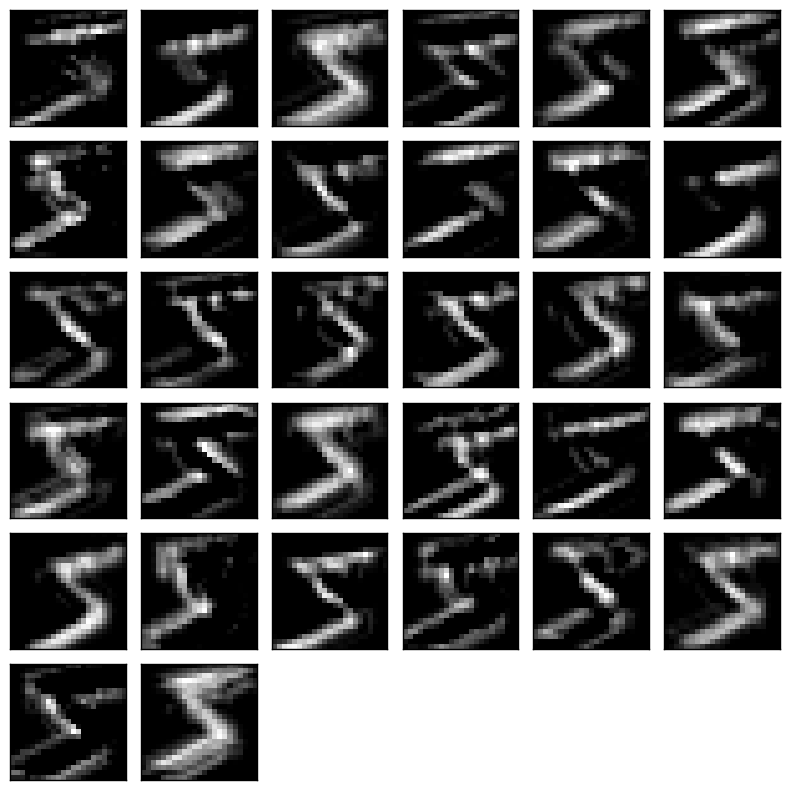

In [111]:
output_layer = modelo.layers[num_camada_para_ser_visualizada].output
output_fn = K.function([modelo.layers[0].input], [output_layer])
output_image = output_fn([X_treino[0:1]])[0]

fig=plt.figure(figsize=(8,8))
for i in range(num_filtros):
    ax = fig.add_subplot(6, 6, i+1)
    ax.imshow(output_image[0,:,:,i],interpolation='nearest', cmap=plt.cm.gray) #to see the first filter
#     ax.imshow(output_image[0,:,:,i],cmap=plt.cm.gray)
    plt.xticks(np.array([]))
    plt.yticks(np.array([]))
    plt.tight_layout()
plt.show()

In [112]:
!lsimport Image
jpgfile = Image.open("picture.jpg")

3_digit.jpg
fontes_de_pesquisa.md
MNIST - Exemplo de implementação no Keras.ipynb
model_trained.h5
README.md
Untitled.ipynb
Visualizar camadas intermediarias.ipynb
weights.h5


In [213]:
from PIL import Image

In [278]:
jpg = Image.open('3_digit.jpg').convert('L', palette=0)
matrix_3 = np.asarray(jpg).astype('float32')
matrix = matrix_3.reshape((1, 28, 28, 1))
matrix.shape
np.min(matrix[0,:,:,0])

67.0

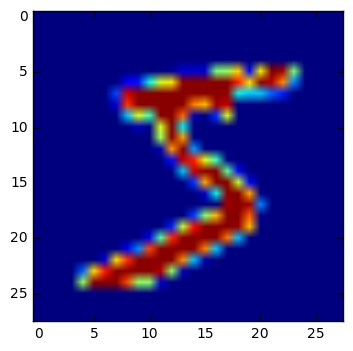

In [279]:
plt.imshow(X_treino[0,:,:,0])
plt.show()

In [280]:
print(np.min(X_treino[0,:,:,0]))

0.0


In [281]:
modelo.predict(X_treino[0:1])

array([[ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.]], dtype=float32)

In [282]:
modelo.predict(matrix)

array([[ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]], dtype=float32)

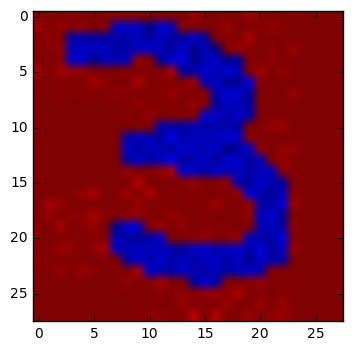

In [283]:
plt.imshow(matrix[0,:,:,0])
plt.show()